In [ ]:
# %pip install sdv

### TPS과 Latency에 대해서 각각 다른 scaler 사용하기

### Data Prepare (Metric)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

In [2]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)


In [3]:
metrics = metrics.replace([np.inf],9999999)

metrics


,tps,latency
0,0.216666,20847397
1,0.322221,12744942
2,3789.313102,1076
3,0.166667,12510551
4,0.266666,10686198
...,...,...
995,0.138889,11836756
996,0.149999,16386967
997,0.227778,19293708
998,0.188888,10529195


In [4]:
print(metrics['tps'].min() , metrics['tps'].max())
print(metrics['latency'].min() , metrics['latency'].max())


0.1055552118015207 4163.050339357126
898 22452142


### Data Prepare (Config)

In [5]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_AA/configs/my_*.cnf")


In [6]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_AA/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


In [7]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,91200,8000,63,7680,163577856,57344,104448,1,0.138889,11836756
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,89600,2000,29,11520,230686720,69632,61440,0,0.149999,16386967
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,66000,8000,48,12544,536870912,81920,108544,1,0.227778,19293708
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,70400,2000,57,3840,218103808,36864,63488,1,0.188888,10529195


In [8]:
### boolean에 해당하는 열 정리

discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

In [9]:
### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [10]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [11]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data)

In [12]:
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

In [62]:
# y_train_tps
# metrics.shape
scaled_y_test.shape

(300, 2)

In [13]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# X_all = np.array(A_config)
# Y_all = np.array(metrics)

# X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)
# X_scaler = MinMaxScaler().fit(X_train)
# Y_scaler = MinMaxScaler().fit(y_train)

# scaled_X_train = X_scaler.transform(X_train)
# scaled_X_test = X_scaler.transform(X_test)
# scaled_y_train = Y_scaler.transform(y_train)
# scaled_y_test = Y_scaler.transform(y_test)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test))



epoch 0  | loss: 1.41663 | val_0_mse: 0.15855 |  0:00:00s
epoch 10 | loss: 0.06162 | val_0_mse: 0.05381 |  0:00:01s
epoch 20 | loss: 0.04746 | val_0_mse: 0.03989 |  0:00:02s
epoch 30 | loss: 0.02444 | val_0_mse: 0.04255 |  0:00:03s
epoch 40 | loss: 0.01939 | val_0_mse: 0.04337 |  0:00:04s
epoch 50 | loss: 0.01721 | val_0_mse: 0.04428 |  0:00:04s
epoch 60 | loss: 0.01206 | val_0_mse: 0.04511 |  0:00:05s
epoch 70 | loss: 0.00925 | val_0_mse: 0.02382 |  0:00:06s
epoch 80 | loss: 0.00859 | val_0_mse: 0.03314 |  0:00:07s
epoch 90 | loss: 0.00927 | val_0_mse: 0.02768 |  0:00:08s
epoch 100| loss: 0.00856 | val_0_mse: 0.02239 |  0:00:09s
epoch 110| loss: 0.00651 | val_0_mse: 0.02801 |  0:00:10s
epoch 120| loss: 0.00757 | val_0_mse: 0.0261  |  0:00:11s
epoch 130| loss: 0.01073 | val_0_mse: 0.02919 |  0:00:12s
epoch 140| loss: 0.00756 | val_0_mse: 0.02378 |  0:00:12s
epoch 150| loss: 0.00577 | val_0_mse: 0.02246 |  0:00:13s
epoch 160| loss: 0.00631 | val_0_mse: 0.01967 |  0:00:14s
epoch 170| los

In [49]:
scaled_y_train.shape

(700, 2)

In [ ]:
for i in range (len(predictions)):
    print('r2_score : ', r2_score(predictions[i], scaled_y_test[i]))
    # print('Latency_r2_score : ', r2_score(predictions[i][1], scaled_y_test[i][1]))
    
    # print(predictions[i][1],'|', scaled_y_test[i][1])
# print('--------------------')
# print(scaled_y_test)

In [14]:
from sklearn.metrics import r2_score

#TPS , Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.910365480193492
Column 1 R2 Score: 0.6778214095338447


### LHS SAMPLING

In [17]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']


In [34]:
knob_info

,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [175]:
# import numpy as np

# def lhs_sampling(min_val, max_val, num_samples):
#     # LHS 샘플 생성
#     lhs_samples = np.linspace(min_val, max_val, num_samples, endpoint=False)
#     np.random.shuffle(lhs_samples)
#     return lhs_samples
# samples = lhs_sampling(knob_min, knob_max, 4000)

# # 생성된 LHS 샘플 출력
# print(samples)
# # samples.shape

[[7.57500000e-01 4.54502425e+04 7.94395648e+06 ... 9.95353600e+04
  9.95353600e+04 7.57500000e-01]
 [1.22750000e-01 7.36587725e+03 1.29072026e+06 ... 1.69873920e+04
  1.69873920e+04 1.22750000e-01]
 [2.71500000e-01 1.62907285e+04 2.84986778e+06 ... 3.63320320e+04
  3.63320320e+04 2.71500000e-01]
 ...
 [6.67000000e-01 4.00203330e+04 6.99536589e+06 ... 8.77660160e+04
  8.77660160e+04 6.67000000e-01]
 [7.89000000e-01 4.73402110e+04 8.27412890e+06 ... 1.03631872e+05
  1.03631872e+05 7.89000000e-01]
 [2.90750000e-01 1.74457092e+04 3.05163981e+06 ... 3.88354560e+04
  3.88354560e+04 2.90750000e-01]]


In [ ]:
# #LHS sampling    
# from pyDOE import *
# from scipy.stats.distributions import norm
# import sys
# #for num in range(10):

# n = len(flag_knob)
# samples = 100
# design = lhs(n, samples)
 
# mean = flag_knob['mean']
# std = flag_knob['std'] 

# means = mean.values
# std_vs = std.values
    
# for k in range(n):
#     design[:,k] = norm(loc=means[k], scale=std_vs[k]).ppf(design[:,k])

# for p in range(samples):
#     for kk in range(len(flag_knob)):
#         if np.round(design[p][kk],0) < flag_knob['min'][kk]:
#             design[p][kk] = flag_knob['min'][kk]
#         elif np.round(design[p][kk],0) > flag_knob['max_64mb'][kk]:
#             design[p][kk] = flag_knob['max_64mb'][kk]
#             #design[p][kk] = np.trunc(design[p][kk])
#         elif np.round(design[p][kk],0) == -0.0:
#             design[p][kk] = 0.0
            
              
# import sys

# param_name = flag_knob['knob']
# values = []

# for sample_ind in range(len(design)):
#     sample_by_value = []
#     for i in range(len(design[sample_ind])):
#             sample_by_value.append(np.round(design[sample_ind][i], 0))            
#     values.append(sample_by_value)
# values = np.array(values)
# value_df = pd.DataFrame(values, columns=param_name)

In [115]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        # knob_info = KNOB_DETAILS[knob]
        # knob_info = KNOB_DETAILS['name'][knob]
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        

    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    # samples = samples.T
    # print(samples)
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    #print(minvals[1])
    for fidx in range(nfeats):
        #print(minvals[fidx])
        #print("==")
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples


# A_config_columns = A_config.columns.to_list()
# A_config_columns_stripped = [column.strip() for column in A_config_columns]
# LH_Sampling(A_config_columns_stripped, knob_info, 4000)
A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4)


In [116]:
# sample // 0,1만 나오는게 첫번째 column에 대해서만 값을 뽑아오는 것 같음 because of sample.T
A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)

In [ ]:
mm_sample

In [25]:
# sample.T
# A_config_columns = A_config.columns.to_list()
# A_config_columns_stripped = [column.strip() for column in A_config_columns]
# m_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)

In [95]:
samples = mm_sample

In [230]:
# import pandas as pd
# import numpy as np
# from pyDOE import *

# import pandas as pd

# knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

# knob_min = knob_info['raw_min']
# knob_max = knob_info['raw_max']

# sample_num = 4000
# num_variables = len(knob_min)

# raw_samples = lhs(num_variables, samples=sample_num, criterion='maximin')

# for i in range(num_variables):
#     raw_samples[:, i] = knob_min[i] + raw_samples[:, i] * (knob_max[i] - knob_min[i])


# samples = np.round(raw_samples, decimals=1)  
# # sample_df = pd.DataFrame(rounded_samples, columns=A_config.columns)  
# #

# # print(sample_df.head())



In [189]:
samples.shape

(4000, 138)

In [159]:
# knob_info['name'][0]['type'] , A_config_columns_stripped[0]
# knob_info['type'][0]
# len(A_config_columns_stripped)
# column_name = A_config.columns[0]
samples

array([[1.38562521e-01, 5.04354389e+04, 7.92304621e+06, ...,
        6.69632252e-01, 6.73323547e-01, 7.24427787e-01],
       [1.47419808e-02, 1.81032080e+04, 1.01628085e+07, ...,
        3.46080523e-01, 5.23735580e-01, 5.76218575e-01],
       [9.21106765e-02, 2.12268314e+04, 4.99981788e+05, ...,
        2.68824491e-03, 2.75343084e-01, 9.83198233e-01],
       ...,
       [2.62610135e-01, 4.30162139e+04, 5.95472472e+06, ...,
        8.52282258e-01, 9.49019758e-01, 8.26461330e-01],
       [4.70419735e-02, 3.68483252e+04, 7.23280074e+06, ...,
        7.39303755e-01, 2.55543575e-01, 8.42326911e-01],
       [5.61800661e-02, 4.48680504e+04, 2.97569154e+06, ...,
        4.07505500e-01, 9.70919166e-01, 4.63039076e-01]])

In [99]:
A_config.columns

Index(['automatic_sp_privileges ', 'back_log ', 'binlog_cache_size ',
       'binlog_group_commit_sync_delay ',
       'binlog_group_commit_sync_no_delay_count ',
       'binlog_rows_query_log_events ', 'binlog_stmt_cache_size ',
       'bulk_insert_buffer_size ', 'default_week_format ',
       'div_precision_increment ',
       ...
       'stored_program_cache ', 'sync_binlog ', 'table_definition_cache ',
       'table_open_cache ', 'table_open_cache_instances ',
       'thread_cache_size ', 'tmp_table_size ',
       'transaction_alloc_block_size ', 'transaction_prealloc_size ',
       'updatable_views_with_limit '],
      dtype='object', name='Sample', length=138)

In [231]:
# import pandas as pd
# from pyDOE import lhs

# knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

# knob_min = knob_info['raw_min'].values
# knob_max = knob_info['raw_max'].values

# # LHS 샘플링을 수행
# num_samples = 4000  # 샘플 수를 데이터프레임 행 수와 동일하게 설정
# samples = lhs(138, samples=num_samples)

# # LHS 샘플을 실제 값 범위로 변환하여 업데이트
# for i in range(len(knob_info.columns)):
#     samples[:, i] = knob_min[i] + samples[:, i] * (knob_max[i] - knob_min[i])

# # 샘플 데이터프레임 생성
# # sampled_df = pd.DataFrame(data=samples, columns=knob_info.columns)


In [244]:
# samples = np.round(samples,0)
# samples

array([[1.000000e+00, 3.760200e+04, 6.204632e+06, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 3.189500e+04, 4.978728e+06, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.564400e+04, 8.781752e+06, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [0.000000e+00, 3.710000e+02, 3.450903e+06, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 8.091000e+03, 4.066268e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.134500e+04, 7.057609e+06, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00]])

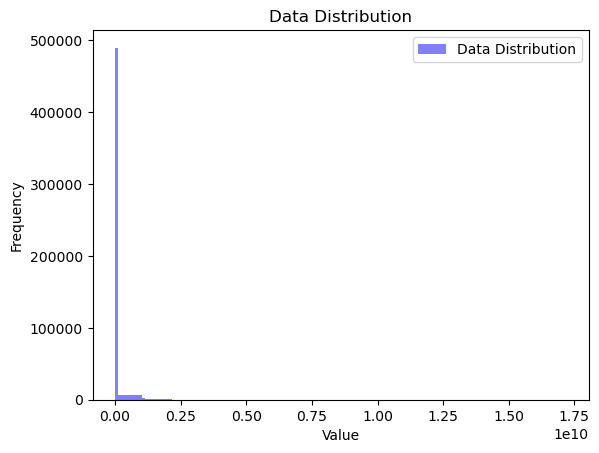

In [245]:
import numpy as np
import matplotlib.pyplot as plt


# 데이터를 1차원으로 변환
flattened_data = samples.flatten()
# flattened_data_A = np.array(A_config).flatten()
# flattened_data_A = A_config.flatten()
# 히스토그램을 이용한 데이터 분포 시각화
plt.hist(flattened_data, bins=150, alpha=0.5, color='b', label='Data Distribution')
# plt.hist(flattened_data_A, bins=50, alpha=0.5, color='r', label='Data Distribution')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.legend(loc='upper right')
plt.show()


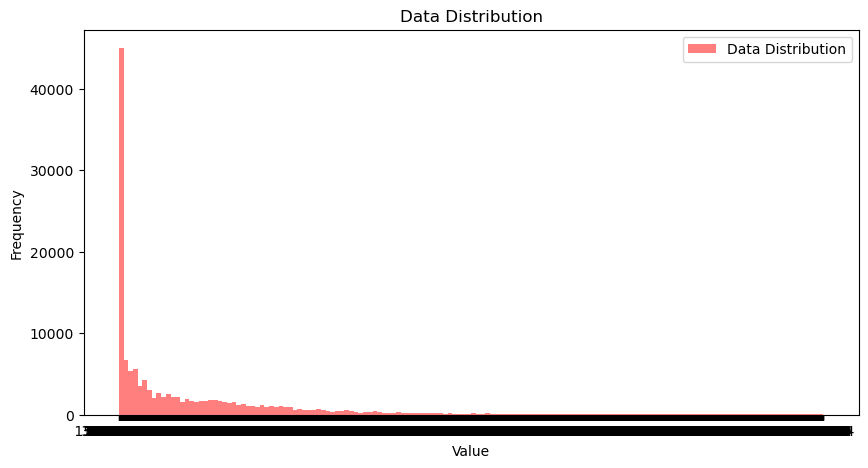

In [234]:
import numpy as np
import matplotlib.pyplot as plt


# 데이터를 1차원으로 변환
# flattened_data = samples.flatten()
flattened_data_A = np.array(A_config).flatten()
# flattened_data_A = A_config.flatten()
# 히스토그램을 이용한 데이터 분포 시각화
# plt.hist(flattened_data, bins=50, alpha=0.5, color='b', label='Data Distribution')
fig = plt.figure(figsize=(10, 5))
plt.hist(flattened_data_A, bins=150, alpha=0.5, color='r', label='Data Distribution')


plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Data Distribution')
# plt.figure(figsize=(15,6))
# plt.xlim(0, len(data))
plt.legend(loc='upper right')
# plt.xticks(rotation=45)
# plt.xticks(np.arange(0, len(flattened_data_A), step=150))
plt.show()


In [165]:
samples.shape

(4000, 138)

In [18]:
# X_scaler = MinMaxScaler().fit(X_train)
# Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)
# Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)

# scaled_X_train = X_scaler.transform(X_train)
# scaled_X_test = X_scaler.transform(X_test)

# scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)
# scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)

# scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)
# scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)

In [103]:
### LHS sampling으로 생성한 X값에 대한 scaling

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
samples_ = np.array([list(item.values()) for item in samples])
new_X = np.array(samples_)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)
# print(new_X_)

predictions_new = regressor.predict(new_X_) #scaling O


In [ ]:
# samples[137] , samples[136]

In [248]:
predictions_new

array([[-9.0938695e-03,  5.4809105e-01],
       [ 8.1738591e-01,  2.4970934e-02],
       [ 1.0808691e-02,  5.1625794e-01],
       ...,
       [-1.5083849e-03,  5.1231360e-01],
       [-6.8597496e-04,  5.4062784e-01],
       [ 6.1651729e-03,  5.6469852e-01]], dtype=float32)

### 수정한 부분 = inverse_new_ ~ 

In [104]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

# Y_scaler = MinMaxScaler().fit(predictions_new)
predictions_new_df = pd.DataFrame(predictions_new)

# Y_scaler_tps = MinMaxScaler().fit(predictions_new[:, 0].reshape(-1, 1))
# Y_scaler_latency = MinMaxScaler().fit(predictions_new[:, 1].reshape(-1, 1))

# inverse를 통해서 원래 데이터 형태로
inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

# inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new_tps)
# inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new_lat)
 

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)
# inverse_new_pred_pd

new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)
# new_metrics_re = new_metrics_re.drop(['index'], axis=1)

new_metrics_re = new_metrics_re.reset_index()



In [105]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)

new_metrics_re

,tps,latency
0,0.216666,20847397.00
1,0.322221,12744942.00
2,3789.313102,1076.00
3,0.166667,12510551.00
4,0.266666,10686198.00
...,...,...
999,0.272221,9697154.00
1000,40.862816,11809634.00
1001,757.126099,9257261.00
1002,44.942787,12173335.00


### 인자 정리
- new_X = samples = LHS Sampling으로 생성한 데이터
<!-- - new_metrics = 생성한 데이터에 대해서 TabNET이 예측한 metrics + 원래 metrics (scaling X) -->
- new_metrics_re = 원래 metric (A_metrics) + 생성한 데이터로 예측한 metric (scaling X)
- new_Samples = 원래 config + 생성한 config (scaling X)
- newnewnew = AutoEncoder에 넣을 수 있는 데이터셋

In [106]:
# inversed_new_config = pd.DataFrame(inverse_transformed_samples)
new_X_pd = pd.DataFrame(new_X)
# new_X_pd = round(new_X_pd).astype(int)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

In [107]:
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples = new_Samples.round()

In [108]:
new_Samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,10000,10420224,75000,35000,1,8683520,838860800,1,11,...,81920,140000,81600,8000,32,5632,801112064,106496,75776,1
1000,0,22864,6921219,540594,52724,0,490202,666829206,4,10,...,312975,315029,91651,6728,56,4469,897892542,19079,7369,0
1001,0,49040,656784,434485,413655,0,3194390,906341269,1,24,...,476873,27065,59238,9719,4,15489,222940551,37557,82900,0
1002,1,30897,3224827,85146,835675,1,6351255,487274300,2,22,...,189794,754465,555,4316,25,2630,330715989,74438,50161,1


In [141]:
new_Samples.shape


(5000, 138)

In [ ]:
new_X[136] , new_X[137]

In [109]:
new_X_pd['transaction_alloc_block_size '] , new_X_pd['transaction_prealloc_size ']

(0     19079
 1     37557
 2     74438
 3    100957
 Name: transaction_alloc_block_size , dtype: int64,
 0      7369
 1     82900
 2     50161
 3    107838
 Name: transaction_prealloc_size , dtype: int64)

In [48]:
new_metrics_re


,tps,latency
0,0.216666,2.084740e+07
1,0.322221,1.274494e+07
2,3789.313102,1.076000e+03
3,0.166667,1.251055e+07
4,0.266666,1.068620e+07
...,...,...
4995,-0.006409,5.664213e-01
4996,-0.006072,5.689327e-01
4997,-0.003377,5.631903e-01
4998,-0.003193,5.655788e-01


### NEW_IDEA
### AE Train set에 추가 (1000 + 10000) AUG == new_Samples

In [110]:
# for i in range(len(new_X_pd.columns)):
#     new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
# new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

# new_Samples = new_Samples.reset_index()
# new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples

newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

In [111]:
newnewwnew['transaction_alloc_block_size '],newnewwnew['transaction_prealloc_size ']

(0         28672
 1        110592
 2          8192
 3         16384
 4        126976
          ...   
 999      106496
 1000      19079
 1001      37557
 1002      74438
 1003     100957
 Name: transaction_alloc_block_size , Length: 1004, dtype: object,
 0         94208
 1         71680
 2        122880
 3         83968
 4         57344
          ...   
 999       75776
 1000       7369
 1001      82900
 1002      50161
 1003     107838
 Name: transaction_prealloc_size , Length: 1004, dtype: object)

In [50]:
# new_Samples
new_metrics_re['latency']

0       2.084740e+07
1       1.274494e+07
2       1.076000e+03
3       1.251055e+07
4       1.068620e+07
            ...     
4995    5.664213e-01
4996    5.689327e-01
4997    5.631903e-01
4998    5.655788e-01
4999    5.689189e-01
Name: latency, Length: 5000, dtype: float64

In [51]:
new_Samples.values.shape

(5000, 138)

### 원래 sample + 생성한 sample에 대해 AE가 되는지 확인
- Config와 Metric 따로 스케일링!!

In [112]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler = MinMaxScaler()
scaled_samples = scaler.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=128, shuffle=True)


In [28]:
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.model_selection import train_test_split
# import torch
# from torch.utils.data import  TensorDataset, DataLoader

# X_train, X_test = train_test_split(newnewwnew, test_size=0.2, shuffle=True)

# scaler = MinMaxScaler()
# # new_train = pd.concat([X_train,full_samples])
# X_scaler = scaler.fit_transform(X_train)
# X_test_scaler = scaler.fit_transform(X_test)


# dataset_tr = TensorDataset(torch.tensor(X_scaler))
# dataset_te = TensorDataset(torch.tensor(X_test_scaler))

# trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=128, shuffle=True)
# testloader = torch.utils.data.DataLoader(dataset_te, batch_size=128, shuffle=True)

In [113]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        # nn.Linear(140,64),
        # nn.ReLU(),
        # nn.Dropout(p=0.3),
        # nn.Linear(64,32),
        # nn.ReLU(),
        # nn.Linear(32,16), #잠재변수 15개로 줄임 
        # nn.Sigmoid())
        nn.Linear(140,128),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(64,32),
        # nn.ReLU(),
        # nn.Dropout(p=0.2),
        # nn.Linear(32,16), #잠재변수 15개로 줄임 
        #잠재변수 15개로 줄임 
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        # nn.Linear(16,32),
        # nn.ReLU(),
        # nn.Linear(32,64),
        # nn.ReLU(),
        # nn.Linear(64, 140), 
        # nn.Sigmoid()
        # nn.Linear(16,32),
        # nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(32,64),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [114]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(4000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    print('R2_Score :', r2_score(inputs_np, outputs_np, multioutput='variance_weighted') )

[1] tr_loss : 0.126 | val_loss : 0.127
R2_Score : -0.02746745894259299
[301] tr_loss : 0.113 | val_loss : 0.116
R2_Score : 0.06345240154985318
[601] tr_loss : 0.108 | val_loss : 0.114
R2_Score : 0.08122255469227901
[901] tr_loss : 0.102 | val_loss : 0.111
R2_Score : 0.11495309452138802
[1201] tr_loss : 0.099 | val_loss : 0.110
R2_Score : 0.11808610121150855
[1501] tr_loss : 0.096 | val_loss : 0.110
R2_Score : 0.12452321683147463
[1801] tr_loss : 0.094 | val_loss : 0.111
R2_Score : 0.11158279501607309
[2101] tr_loss : 0.092 | val_loss : 0.112
R2_Score : 0.09811421914755557
[2401] tr_loss : 0.092 | val_loss : 0.113
R2_Score : 0.08532369377386982
[2701] tr_loss : 0.091 | val_loss : 0.113
R2_Score : 0.08159732967256032
[3001] tr_loss : 0.089 | val_loss : 0.113
R2_Score : 0.09064671209709141
[3301] tr_loss : 0.088 | val_loss : 0.113
R2_Score : 0.0833897017263509
[3601] tr_loss : 0.087 | val_loss : 0.113
R2_Score : 0.09068635308752852
[3901] tr_loss : 0.086 | val_loss : 0.114
R2_Score : 0.08

In [228]:
inputs.shape , outputs.shape

(torch.Size([128, 140]), torch.Size([128, 140]))

In [36]:
from sklearn.metrics import r2_score
import numpy as np

# PyTorch Tensor를 NumPy 배열로 변환
inputs_np = inputs.cpu().detach().numpy()
outputs_np = outputs.cpu().detach().numpy()

# r2_score 함수로 계산
r2 = r2_score(inputs_np, outputs_np, multioutput='variance_weighted')

# 결과 출력
print("AE_R2_Score:", r2)


AE_R2_Score: 0.8676905129542692


### Optimization in latent space
- Prediction

In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np

# for data in testloader:
#     inputs = data[0].float().to(device)
#     with torch.no_grad():
#         encoded_vector = model.encoder(inputs)
#         print("Encoded Latent Vector:", encoded_vector)


In [52]:
# print(inputs.shape)
# print(encoded_vector.shape)

torch.Size([88, 140])
torch.Size([88, 32])


In [ ]:
# latent_space = encoded_vector
# print(latent_space.shape)

### TabNet (Optimization과정에서)

In [ ]:
samples.shape

In [117]:
newnewwnew

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397.0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942.0
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076.0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551.0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,14026,2454185,233750,233750,0,2454185,250987151,2,7,...,23682,2338,16,3830,250987936,31423,31423,0,-24.159760,12362169.0
4996,1,51600,9018327,860000,860000,1,9018327,923417969,6,26,...,86056,8600,55,14090,923418112,112865,112865,1,-2.033373,12927488.0
4997,0,7921,1387676,132000,132000,0,1387676,141733921,1,4,...,13547,1321,9,2163,141734810,18190,18190,0,174.697647,11634883.0
4998,0,6271,1099430,104500,104500,0,1099430,112206021,1,3,...,10808,1046,8,1712,112206938,14614,14614,0,186.753723,12172507.0


In [37]:
### 원래 데이터 + LHS Sampling data 차원을 32로 줄인 latent space 구하기
### X = latent config (# 1500) , Y = metrics (# 2)

import torch
import pandas as pd
import numpy as np

# scaler_x = MinMaxScaler()
# # samples_scaler = scaler_x.fit_transform(newnewwnew)
# samples_scaler = scaler_x.fit_transform(scaled_new_Samples)

# # samples_np = samples_scaler.values
# samples_torch = torch.Tensor(samples_scaler).to(device)
ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.3728, 0.7670, 0.0207,  ..., 0.9078, 0.3170, 0.5402],
        [0.6600, 0.5274, 0.8041,  ..., 0.2281, 0.5495, 0.3629],
        [0.8163, 0.9267, 0.1528,  ..., 0.9296, 0.1357, 0.4703],
        ...,
        [0.4022, 0.2229, 0.9877,  ..., 0.0371, 0.9590, 0.2090],
        [0.1203, 0.5901, 0.0088,  ..., 0.9747, 0.5457, 0.5942],
        [0.3181, 0.1697, 0.9891,  ..., 0.0322, 0.9710, 0.2013]],
       device='cuda:0')


In [129]:
encoded_vector_BO.shape

torch.Size([5000, 32])

In [ ]:
new_Samples

In [ ]:
# encoded_vector_BO.shape
new_metrics_re

In [82]:
encoded_vector_BO.shape , new_metrics_re.shape

(torch.Size([5000, 32]), (5000, 2))

In [55]:
# pd.set_option('display.max_columns', None)
# new_metrics_re = new_metrics_re.drop(['index'], inplace=True)
new_metrics_re


True

In [144]:
scaled_lt_y_train , scaled_lt_y_test


# scaled_lt_y_test_tps

(array([[0.00664287, 0.59613637],
        [0.05028929, 0.54034801],
        [0.0060534 , 0.46704272],
        ...,
        [0.00931821, 0.57720615],
        [0.00555245, 0.57567287],
        [0.05296036, 0.55682237]]),
 array([[0.00242117, 0.56991956],
        [0.05578837, 0.57563309],
        [0.00914385, 0.57708539],
        ...,
        [0.00777202, 0.51841332],
        [0.00285107, 0.57200318],
        [0.00607651, 0.57562418]]))

In [66]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)

# Tabnet 모델 생성
lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
# print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions, multioutput='variance_weighted'))
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))



# print('MSE_SCORE : ', test_score)



epoch 0  | loss: 0.11246 | val_0_mse: 0.05793 |  0:00:00s
epoch 10 | loss: 0.00941 | val_0_mse: 0.02254 |  0:00:05s
epoch 20 | loss: 0.00833 | val_0_mse: 0.00665 |  0:00:10s
epoch 30 | loss: 0.00752 | val_0_mse: 0.00568 |  0:00:15s
epoch 40 | loss: 0.00718 | val_0_mse: 0.00623 |  0:00:20s
epoch 50 | loss: 0.00822 | val_0_mse: 0.00789 |  0:00:25s
epoch 60 | loss: 0.00621 | val_0_mse: 0.0064  |  0:00:30s
epoch 70 | loss: 0.0062  | val_0_mse: 0.00509 |  0:00:35s
epoch 80 | loss: 0.0058  | val_0_mse: 0.00716 |  0:00:39s
epoch 90 | loss: 0.00655 | val_0_mse: 0.00555 |  0:00:44s
epoch 100| loss: 0.00667 | val_0_mse: 0.00523 |  0:00:49s
epoch 110| loss: 0.00599 | val_0_mse: 0.00634 |  0:00:54s
epoch 120| loss: 0.00614 | val_0_mse: 0.00772 |  0:00:59s
epoch 130| loss: 0.00565 | val_0_mse: 0.00714 |  0:01:04s
epoch 140| loss: 0.00613 | val_0_mse: 0.00611 |  0:01:09s
epoch 150| loss: 0.00564 | val_0_mse: 0.01289 |  0:01:14s
epoch 160| loss: 0.0055  | val_0_mse: 0.02219 |  0:01:19s
epoch 170| los

In [152]:
scaled_lt_y_test.astype

<function ndarray.astype>

In [67]:
# 예측값
lt_predictions = lt_regressor.predict(lt_X_test)

# 관측값
observed_values = scaled_lt_y_test  

# R2 스코어 계산
ssr = np.sum((observed_values - lt_predictions) ** 2)  # SSR
sst = np.sum((observed_values - np.mean(observed_values)) ** 2)  # SST

r2score = 1 - (ssr / sst)
print('R2 Score:', r2score)


R2 Score: 0.9098613517935096


In [68]:
for i in range(2):  
    r2_score_column = r2_score(lt_predictions[:, i], scaled_lt_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.8999474264916831
Column 1 R2 Score: 0.8754799721752103


In [44]:
print(lt_predictions)
print('-----------------------------------------------')
print(scaled_lt_y_test)

[[ 0.11225808  0.03649522]
 [ 0.48186085 -0.02592714]
 [ 0.48062685 -0.0258454 ]
 ...
 [ 0.11392605  0.04307695]
 [ 0.48159125 -0.02590884]
 [ 0.48185453  0.43068737]]
-----------------------------------------------
[[1.98049512e-01 1.00672759e-02]
 [7.22430608e-01 1.18732419e-04]
 [6.06901725e-01 4.53782885e-03]
 ...
 [1.84296074e-01 1.00831293e-02]
 [1.77544386e-01 1.81238616e-03]
 [7.57689422e-02 4.76842370e-01]]


In [64]:
print(lt_X_test)
print('-----------------------------------------------')
print(scaled_lt_y_test)

[[5.23794711e-01 4.41426307e-01 9.18241203e-01 ... 2.50850737e-01
  9.71134543e-01 2.23279044e-01]
 [1.46030575e-01 8.41418207e-01 8.62705827e-01 ... 2.99709439e-01
  2.15932012e-01 9.25122380e-01]
 [6.96771324e-01 3.86776835e-01 6.51102424e-01 ... 4.75303620e-01
  5.61440706e-01 2.82645792e-01]
 ...
 [8.99117906e-03 7.92759180e-01 1.78370182e-03 ... 6.31797314e-02
  1.09356776e-01 4.46293890e-01]
 [3.10261291e-03 8.73375118e-01 1.50288703e-04 ... 2.23087948e-02
  1.10358626e-01 3.98751765e-01]
 [6.00627899e-01 3.80117774e-01 4.84747857e-01 ... 2.17551485e-01
  5.63026488e-01 1.58527270e-01]]
-----------------------------------------------
[[6.59663204e-13 8.52900483e-06]
 [4.10457294e-13 8.52905660e-06]
 [6.36125876e-09 8.52678553e-06]
 ...
 [1.45836742e-04 6.46241822e-06]
 [1.03140924e-04 7.06210675e-06]
 [3.81139128e-13 8.52904590e-06]]


In [65]:
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 60
new_metrics_re

,tps,latency
0,0.216666,2.084740e+07
1,0.322221,1.274494e+07
2,3789.313102,1.076000e+03
3,0.166667,1.251055e+07
4,0.266666,1.068620e+07
...,...,...
4995,-10.807688,2.239221e+03
4996,-40.018833,2.293283e+03
4997,-38.901749,2.331790e+03
4998,-4.338387,2.268527e+03


In [69]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
latent_pd_T.index
# latent_pd_T

RangeIndex(start=0, stop=32, step=1)

In [ ]:
latent_pd_T

In [72]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            # self.pbounds[v] = (0,18)
            self.pbounds[str(v)] = (0, 1)
            
    
    def train_regression_model(self):
        X_all = np.array(self.configs)
        Y_all = np.array(self.metrics)
        
        cnt = 0
        while(True):
            bo_lt_X_train, bo_lt_X_test, bo_lt_y_train, bo_lt_y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)


            bo_y_train_tps = bo_lt_y_train[:,0][:, np.newaxis]
            bo_y_train_latecy = bo_lt_y_train[:,1][:, np.newaxis]
            bo_y_test_tps = bo_lt_y_test[:,0][:, np.newaxis]
            bo_y_test_latecy = bo_lt_y_test[:,1][:, np.newaxis]


            bo_Y_scaler_tps  = MinMaxScaler().fit(bo_y_train_tps)
            bo_Y_scaler_latecy = MinMaxScaler().fit(bo_y_train_latecy)


            bo_scaled_lt_y_train_tps = bo_Y_scaler_tps.transform(bo_y_train_tps)
            bo_scaled_lt_y_train_latency = bo_Y_scaler_latecy.transform(bo_y_train_latecy)


            bo_scaled_lt_y_test_tps = bo_Y_scaler_tps.transform(bo_y_test_tps)
            bo_scaled_lt_y_test_latency = bo_Y_scaler_latecy.transform(bo_y_test_latecy)


            bo_scaled_lt_y_train = np.concatenate([bo_scaled_lt_y_train_tps, bo_scaled_lt_y_train_latency], axis = 1)
            bo_scaled_lt_y_test = np.concatenate([bo_scaled_lt_y_test_tps, bo_scaled_lt_y_test_latency], axis = 1)

            # Tabnet 모델 생성
            bo_lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
                
            # 모델 학습
            bo_lt_regressor.fit(X_train=bo_lt_X_train, y_train=bo_scaled_lt_y_train,
                        eval_set=[(bo_lt_X_test, bo_scaled_lt_y_test)],
                        patience=100, 
                        batch_size = 128,
                        max_epochs=10000,
                        eval_metric=['mse'])

            # 테스트 데이터로 예측
            bo_lt_predictions = bo_lt_regressor.predict(bo_lt_X_test)

            # 성능 평가
            # print('BEST VALID SCORE : ', lt_regressor.best_cost)
            # # print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions, multioutput='variance_weighted'))
            # print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))
            accuracy = r2_score(bo_scaled_lt_y_test, bo_lt_predictions)
            cnt += 1
            
            print(cnt, accuracy)
            # print(r2_score_)
            if accuracy > 0.80 or cnt > 10:
                break


            # print('BEST VALID SCORE : ', regressor.best_cost)

        self.model = bo_lt_regressor
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.model.predict(x)
        res = res[:,0] / res[:,1]
        # for name in self.config_info.index:
        #     knob = self.config_info.loc[name]
        #     knob_min = knob['raw_min']
        #     knob_max = knob['raw_max']
            
            # if self.reduce_search_space:
            #     knob_min = self.best_configs[name].min()
            #     knob_max = self.best_configs[name].max()
            #     if knob_min == knob_max:
            #         self.min_max_same_knobs.append(name)
            #         knob_max += 1
            # with torch.no_grad():
            #     scaled_X_t = torch.tensor(scaled_X)
            #     scaled_X_t = scaled_X_t.to('cuda:0')
            #     if model.decoder(scaled_X_t) < knob_min:
            #         res == 0
            #     elif model.decoder(scaled_X_t) > knob_max:
            #         res == 0
        
        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)
        # self.optimizer = BayesianOptimization(f=self._target_function, verbose=2, random_state=2)
        self.acquisition_function = UtilityFunction(kind="ei", xi=0.01)
        self.optimizer.maximize(n_iter=self.iteration, acquisition_function=self.acquisition_function)
    
    
    def plot_history(self):
        self.y_obs = - np.array([res["target"] for res in self.optimizer.res])
        
        self.his_inc = []
        inc = np.inf
        ## Get minimum results on each iteration
        for res in self.y_obs:
            if res < inc:
                inc = res
            self.his_inc.append(inc)
#             res.append(his_res)

        plt.plot(self.his_inc)
        plt.xlabel('Iteration')
        plt.ylabel('result')
        plt.show()

### 밑에 다 돌린거고 decoding해서 값 확인해보기

In [73]:
tuner1 = BO(iteration=1000, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re
           )
tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

epoch 0  | loss: 0.10874 | val_0_mse: 0.04849 |  0:00:00s
epoch 10 | loss: 0.00838 | val_0_mse: 0.01306 |  0:00:05s
epoch 20 | loss: 0.00757 | val_0_mse: 0.00853 |  0:00:10s
epoch 30 | loss: 0.00864 | val_0_mse: 0.00855 |  0:00:15s
epoch 40 | loss: 0.00724 | val_0_mse: 0.00784 |  0:00:20s
epoch 50 | loss: 0.00803 | val_0_mse: 0.00704 |  0:00:25s
epoch 60 | loss: 0.00642 | val_0_mse: 0.00666 |  0:00:30s
epoch 70 | loss: 0.00613 | val_0_mse: 0.00853 |  0:00:35s
epoch 80 | loss: 0.00641 | val_0_mse: 0.00691 |  0:00:40s
epoch 90 | loss: 0.00654 | val_0_mse: 0.01132 |  0:00:45s
epoch 100| loss: 0.00812 | val_0_mse: 0.00835 |  0:00:50s
epoch 110| loss: 0.00633 | val_0_mse: 0.00626 |  0:00:54s
epoch 120| loss: 0.00593 | val_0_mse: 0.00643 |  0:00:59s
epoch 130| loss: 0.00651 | val_0_mse: 0.00713 |  0:01:04s
epoch 140| loss: 0.00579 | val_0_mse: 0.00683 |  0:01:09s
epoch 150| loss: 0.00544 | val_0_mse: 0.00691 |  0:01:14s
epoch 160| loss: 0.00515 | val_0_mse: 0.00687 |  0:01:19s
epoch 170| los

In [47]:
ex_data = [0.2515,  0.3851, 0.1983, 0.2072, 0.04203, 0.6034, 0.7527, 0.309, 0.01957, 0.107,
           0.6571, 0.7406, 0.9737, 0.1054, 0.5471, 0.467, 0.3135, 0.9268, 0.1925, 0.1914, 0.7365,
           0.4656, 0.9693, 0.5216, 0.2464, 0.4485, 0.282, 0.4303, 0.4483, 0.5755, 0.1848, 0.99]

In [56]:
ex_data = [0.2168, 0.0, 0.138, 1.0, 0.3111, 0.333, 0.6079, 0.1281, 0.0, 0.2796, 0.3718, 0.3238, 0.5304,
           0.474, 0.1646, 0.5807, 0.9193, 0.09729, 0.1823, 0.1282, 0.3789, 0.4876, 0.9011, 0.1251, 0.3144,
           0.04871, 0.8719, 1.0, 0.5318, 0.5375, 0.7821, 0.865]

In [147]:
ex_data = [0.8619, 0.5249, 0.6002, 0.9991, 0.3543, 0.5662, 0.6583, 0.9311, 0.7842, 0.05524,
           0.02226, 0.5493, 0.7891, 0.3761, 0.1813, 0.631, 0.4767, 0.1582, 0.9703, 0.9681,
           0.9885, 0.0, 0.8136, 0.3381, 0.3356, 0.998, 0.8706, 0.2109, 0.389, 0.1532, 0.0, 0.9467  ]

In [153]:
ex_data = [0.7221, 0.159, 0.6144, 0.6067, 0.1395, 0.08901, 0.1839, 0.5777,
           0.5072, 0.9621, 0.317, 0.3294, 0.3484, 0.5829, 0.1557, 0.1218,
           0.4582, 0.1181, 0.3781, 0.6541, 0.2993, 0.2505, 0.7347, 0.8758,
           0.4597, 0.2604, 0.6993, 0.03379, 0.01242, 0.8155, 0.9409, 0.6644]

In [154]:
ex_data = torch.tensor(ex_data)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([5.7995e-01, 3.9154e-01, 3.4032e-01, 4.6730e-01, 4.9983e-01, 2.5723e-03,
        5.0641e-01, 5.0865e-01, 6.7158e-01, 4.6072e-01, 1.5568e-01, 5.2382e-01,
        3.8959e-01, 3.7220e-01, 5.1225e-01, 5.3412e-01, 4.6454e-01, 4.3930e-02,
        5.6723e-01, 4.6168e-01, 5.1641e-01, 4.6021e-01, 6.1263e-01, 4.4250e-01,
        4.6324e-01, 3.8030e-01, 5.1595e-01, 5.1563e-01, 4.0613e-01, 5.3466e-01,
        5.6480e-01, 9.9539e-01, 4.0301e-06, 5.1165e-01, 5.6176e-01, 4.4316e-01,
        1.1056e-02, 6.7278e-01, 4.5705e-01, 5.4055e-01, 5.9492e-01, 3.7529e-01,
        4.4241e-01, 4.7335e-01, 4.9199e-01, 4.3167e-01, 4.8385e-01, 4.6213e-01,
        4.8467e-01, 4.1488e-01, 4.8369e-01, 4.5622e-01, 5.1629e-01, 3.5227e-01,
        4.6629e-01, 6.3462e-01, 4.8070e-01, 5.9934e-01, 1.8031e-01, 5.9343e-01,
        7.6510e-01, 4.3929e-01, 5.7816e-01, 6.0378e-01, 2.8869e-01, 4.2026e-01,
        5.7638e-01, 5.4151e-01, 1.5001e-01, 4.0022e-01, 4.7405e-01, 5.1615e-01,
        5.1498e-01, 7.575

In [ ]:
for x in decode_value:
    print(x)

In [155]:
# import math
# real_values = [math.exp(x) for x in decode_value]  

# print(real_values)

### latenct space의 지수함수 없애기
converted_values = [float(value) for value in decode_value]
converted_values

[0.5799453854560852,
 0.3915354609489441,
 0.3403227925300598,
 0.46730199456214905,
 0.4998306632041931,
 0.002572296652942896,
 0.506406843662262,
 0.5086506605148315,
 0.6715803146362305,
 0.4607246518135071,
 0.15567909181118011,
 0.5238214135169983,
 0.3895895779132843,
 0.37219637632369995,
 0.5122549533843994,
 0.5341241359710693,
 0.46454012393951416,
 0.04392961412668228,
 0.5672294497489929,
 0.46168410778045654,
 0.5164138674736023,
 0.46020713448524475,
 0.6126294136047363,
 0.44250255823135376,
 0.4632423222064972,
 0.38030266761779785,
 0.5159500241279602,
 0.5156257748603821,
 0.4061272144317627,
 0.5346603393554688,
 0.5648013353347778,
 0.9953863024711609,
 4.030113814224023e-06,
 0.511652410030365,
 0.5617601871490479,
 0.44316166639328003,
 0.011055553331971169,
 0.6727750301361084,
 0.45704910159111023,
 0.5405499935150146,
 0.5949155688285828,
 0.37529242038726807,
 0.44240713119506836,
 0.47334736585617065,
 0.49199360609054565,
 0.4316691756248474,
 0.48385301232

In [90]:
# len(converted_values)
converted_values[0]

0.9060190916061401

In [150]:
### 원본

# import numpy as np

# # real_values 리스트를 NumPy 배열로 변환
# real_values = np.array(real_values)
# rescaled_actual = scaler.inverse_transform(real_values.reshape(1,-1))
# converted_values = np.array(converted_values)
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_bo_metric_tps = df_converted_values[138:139]
real_bo_metric_lat = df_converted_values[139:140]


rescaled_bo_config = scaler.inverse_transform(real_bo_config.values.reshape(1,-1))
rescaled_bo_metric = scaler.inverse_transform(real_bo_metric_tps.values.reshape(1,-1))
real_bo_metric_lat = scaler.inverse_transform(real_bo_metric_lat.values.reshape(1,-1))

rescaled_actual = np.concatenate([rescaled_bo_config,rescaled_bo_metric,real_bo_metric_lat], axis = 1)





In [144]:
rescaled_bo_config.min()

-1030077.8026031891

In [ ]:
converted_values

In [133]:
rescaled_actual

array([[20245124.45053831,  6824041.86079885,  7089120.43819926,
        10293870.78332203,  8757878.45879095, -1014192.569754  ,
         8770618.15950624, 10698786.52500409,  4631496.88569806,
         6117120.39625459,  1667579.40920216,  5973412.96086624,
         2634406.55036609, 21925033.47104742, 12067154.81839097,
         6619538.27522998,  6870684.57651442,  -585289.13008188,
         7087137.71160879, 10038342.60728188,  9028236.14197039,
        10450296.22351169,  9543703.76327053, 10464283.78921492,
         7658389.02709191, 11405976.73893441, 10189960.65285453,
        10316188.18025711,  6971867.3206342 ,  9677720.12379184,
         3522274.03710632, 22447527.06913604, -1025097.89338136,
         7267022.03375614, 14003187.60277238,  8880873.99487873,
         -337753.66751341, 18008820.21667669,  4711524.01408298,
        10625269.57054949,  8416485.55376894,  8444697.24062458,
         7295881.09869022, 10092273.75035827,  9029149.46996212,
         6759923.43630666

In [152]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
0,-312993.336909269,7722664.222059313,8615292.912115816,8289892.695169671,6802430.630870404,-636579.757949999,4728988.524968510,4740584.641056608,6381170.867279645,6469672.699612340,17603112.224200282,8456495.618620429,4411856.900787338,19441444.808589768,8895237.389801543,8884847.846477998,7495181.864113089,-1030765.272825836,7798899.464575116,3817487.889090560,8737447.906503927,7935348.566934939,4291652.439052829,5771776.035415482,1342333.513192549,7125016.677812913,7782759.104310542,5312620.508783970,8136319.217866061,3377288.642397740,-986733.027964625,22452021.622670822,-1031434.942874507,6008690.516997369,18457829.054247595,6871033.110874480,12944930.905657828,19775729.852244731,8249194.659884561,7305819.227029344,5311314.554736026,8505977.699594580,4762504.162924022,6771707.117070451,5693103.851852015,10006560.892774265,6546068.911812508,4529063.827051672,8992426.686012659,7596596.264604719,8973523.945990724,7072157.732808039,6996248.628870126,8132393.657172106,6625384.974113440,6429475.070085151,7636640.622997664,7078616.816360278,22235247.248075910,5142712.107858162,2347294.372582816,11097127.704882070,7772579.521444866,6599190.307389719,22290945.558339365,6452289.373437183,7168979.598217884,7120627.804375261,8530482.884500649,7811509.689674720,12512492.147421937,8061895.234233474,165014.626717814,-1021348.840949279,-1031475.643174453,-502400.196914452,7859426.165501362,3609691.073740025,3601644.689126297,5264581.556023572,-242009.730345911,7651835.461333634,2706900.997390862,31043.757629035,9771199.418712415,11816918.345757302,6321262.149967726,7755299.775762258,8834107.402493021,7543539.256901255,19983053.206762772,15279008.125803441,-1003830.695828815,6839389.270400869,5431188.678683488,9834177.757918376,4243586.541367004,10148851.095072001,5938061.918574858,7826850.100594813,7256540.107831134,4804871.383849190,5194419.069817530,6236453.522088945,6646346.026490683,10746693.902544219,11081292.487149600,6941372.663733324,4231424.931779046,4463501.574477538,5813852.111172404,18149248.769581325,7358685.870584341,7533672.515117804,4382779.476977077,10254522.793781020,4220186.798271614,4482874.975859195,19722367.702009164,7418348.934160553,11844642.924350694,10148750.314052224,6913590.695948115,839722.470595916,1630003.310958513,-1031536.789215367,-942453.018058790,8709045.155631619,5566219.848084504,8824601.792697104,6853117.884872722,5353151.275570977,8672721.996420303,4486150.009067853,6610430.890435826,6302424.497687731,4732702.025600018,1054761.696973590


In [66]:
# len(A_config.columns)
rescaled_actual_pd.iloc[0][1]

136737.13672123852

In [146]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 20245124
back_log  = 6824042
binlog_cache_size  = 7089120
binlog_group_commit_sync_delay  = 10293871
binlog_group_commit_sync_no_delay_count  = 8757878
binlog_rows_query_log_events  = -1014193
binlog_stmt_cache_size  = 8770618
bulk_insert_buffer_size  = 10698787
default_week_format  = 4631497
div_precision_increment  = 6117120
end_markers_in_json  = 1667579
eq_range_index_dive_limit  = 5973413
expire_logs_days  = 2634407
explicit_defaults_for_timestamp  = 21925033
flush_time  = 12067155
ft_min_word_len  = 6619538
ft_query_expansion_limit  = 6870685
general_log  = -585289
group_concat_max_len  = 7087138
innodb_adaptive_hash_index_parts  = 10038343
innodb_adaptive_max_sleep_delay  = 9028236
innodb_autoextend_increment  = 10450296
innodb_buffer_pool_size  = 9543704
innodb_change_buffer_max_size  = 10464284
innodb_cmp_per_index_enabled  = 7658389
innodb_commit_concurrency  = 11405977
innodb_compression_failure_threshold_pct  = 10189961
innodb_compression_level  =

### Data Prepare (Metric)

In [ ]:
inputs

In [ ]:
latent_pd = pd.DataFrame(latent_space.cpu().numpy())

In [ ]:
latent_pd

In [ ]:
latent_pd.max()

### Tabnet type 나눈거

In [ ]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_all = np.array(latent_space.cpu().numpy())
Y_all = np.array(new_metric)

### 데이터 나누기
### boolean에 해당하는 열 정리

discrete_columns = [samples.columns[0], samples.columns[5],samples.columns[10],samples.columns[13],
                    samples.columns[17],samples.columns[24],samples.columns[30],samples.columns[31],
                    samples.columns[32],samples.columns[34],samples.columns[36],samples.columns[37],
                    samples.columns[58],samples.columns[60],samples.columns[64],samples.columns[68],
                    samples.columns[72],samples.columns[73],samples.columns[74],samples.columns[75],
                    samples.columns[77],samples.columns[80],samples.columns[82],samples.columns[83],
                    samples.columns[90],samples.columns[91],samples.columns[92],samples.columns[93],
                    samples.columns[118],samples.columns[123],samples.columns[124],samples.columns[125],
                    samples.columns[126]]

discrete_idxs = [0, 5, 10, 13, 17, 24, 30, 31, 32, 34, 36, 37, 58, 60, 64, 68, 72, 73, 74, 75, 77, 80, 82,
                 83, 90, 91, 92, 93, 118, 123, 124, 125, 126]

discrete_dims = 

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=50, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

# regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train)



# predictions_array =[]
# CV_score_array    =[]

# CV_score_array.append(regressor.best_cost)
# predictions_array.append(np.expm1(regressor.predict(scaled_X_test)))

# predictions = np.mean(predictions_array,axis=0)

# 테스트 데이터로 예측
# y_pred = rf_regressor.predict(scaled_X_test)
predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
print('MSE_SCORE : ', test_score)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

X_all = np.array(new_knobs)
Y_all = np.array(new_metric)

est = XGBRegressor()

param_grid = {
    'n_estimators' : [15000, 20000, 25000],
    'max_depth' : [12,13,14,15],
    'learning_rate' : [0.1, 0.001],  
}

grid_search = GridSearchCV(estimator=est, param_grid=param_grid, scoring='accuracy', cv = 3)

grid_search.fit(X_all,Y_all)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

### ㅎㅎ..

In [ ]:
#####Shap_value

###XGBRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score
import numpy as np

X_all = np.array(new_knobs)
Y_all = np.array(new_metric)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.4, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)

estimator = XGBRegressor(
    objective = 'reg:squarederror',
    random_state = 2, n_estimators = 15000, max_depth = 12, learning_rate = 0.01)

my_model_pred = MultiOutputRegressor(estimator = estimator).fit(scaled_X_train, scaled_y_train)


pred = my_model_pred.predict(scaled_X_test)

#rmse
print('RMSE : ',mean_squared_error(scaled_y_test, pred, squared=False))
print('R2_SCORE : ', r2_score(scaled_y_test, pred))
# print('PCC : ', precision_score(y_test, pred, average='weighted'))

# rmse r2 pcc




- Optimization

In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics,config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.reduce_search_space = reduce_search_space
        # self.top_z_knob = top_z_knob
        # self.best_configs = best_configs
        self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for name in self.config_info.index:
            knob = self.config_info.loc[name]
            knob_type = knob['type']
            knob_min = knob['raw_min']
            knob_max = knob['raw_max']
            
            # if self.reduce_search_space:
            #     knob_min = self.best_configs[name].min()
            #     knob_max = self.best_configs[name].max()
            #     if knob_min == knob_max:
            #         self.min_max_same_knobs.append(name)
            #         knob_max += 1
            
            if knob_type == 'boolean' or knob_type == 'integer':
                self.pbounds[name] = (int(knob_min), int(knob_max))
            elif knob_type == 'float':
                self.pbounds[name] = (float(knob_min), float(knob_max))
    
    def train_regression_model(self):
        X_all = np.array(self.configs)
        Y_all = np.array(self.metrics)

        cnt = 0
        while(True):
            X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)
            self.X_scaler = MinMaxScaler().fit(X_train)
            self.y_scaler = MinMaxScaler().fit(y_train)

            scaled_X_train = self.X_scaler.transform(X_train)
            scaled_X_test = self.X_scaler.transform(X_test)
            scaled_y_train = self.y_scaler.transform(y_train)
            scaled_y_test = self.y_scaler.transform(y_test)

            estimator = XGBRegressor(
                objective = 'reg:squarederror',
                random_state = 2, n_estimators = 15000, max_depth = 12, learning_rate = 0.01)

            my_model_pred = MultiOutputRegressor(estimator = estimator).fit(scaled_X_train, scaled_y_train)
            pred = my_model_pred.predict(scaled_X_test)
            accuracy = r2_score(scaled_y_test, pred)

            cnt += 1
            print(cnt, accuracy)
            if accuracy > 0.45 or cnt > 10:
                break

        #rmse
        print('RMSE : ',mean_squared_error(scaled_y_test, pred, squared=False))
        print('R2_SCORE : ', r2_score(scaled_y_test, pred))

        self.model = my_model_pred
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        scaled_X = self.X_scaler.transform([x])
        
        res = self.model.predict(scaled_X)
        res = res[:,0] / res[:,1]
        
        return res.squeeze()
#         print(y)
        
#         X = pd.DataFrame(config.get_dictionary().values(), index=self.config_info.index).T
#         X = np.array(X)
#         scaled_X = self.X_scaler.transform(X)
        
#         res = self.model.predict(scaled_X)
#         res = res[:,1] / res[:,0]
        
#         return res # a smaller result means better
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)
        # self.optimizer = BayesianOptimization(f=self._target_function, verbose=2, random_state=2)
        self.acquisition_function = UtilityFunction(kind="ei", xi=0.01)
        self.optimizer.maximize(n_iter=self.iteration, acquisition_function=self.acquisition_function)
    
    
    def plot_history(self):
        self.y_obs = - np.array([res["target"] for res in self.optimizer.res])
        
        self.his_inc = []
        inc = np.inf
        ## Get minimum results on each iteration
        for res in self.y_obs:
            if res < inc:
                inc = res
            self.his_inc.append(inc)
#             res.append(his_res)

        plt.plot(self.his_inc)
        plt.xlabel('Iteration')
        plt.ylabel('result')
        plt.show()

In [ ]:
tuner1 = BO(iteration=150, 
           configs=new_knobs,
           metrics=new_metric
           )
tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()